## SIT-789 Task-6.1P

In [1]:
import numpy as np
#setup camera with a simple camera matrix P
f = 100
cx = 200
cy = 200
K = np.array([[f, 0, cx], [0, f, cy], [0, 0, 1]])
I = np.eye(3) #i.e., R
t = np.array([[0], [0], [0]])
P = np.dot(K, np.hstack((I, t)))

In [2]:
def project(P, X): #X is an array of 3D points
    x = np.dot(P, X)
    for i in range(3): #convert to inhomogeneous coordinates
        x[i] /= x[2]
    return x

In [3]:
#load data
points_3D = np.loadtxt('house.p3d').T #T means tranpose
points_3D = np.vstack((points_3D, np.ones(points_3D.shape[1])))

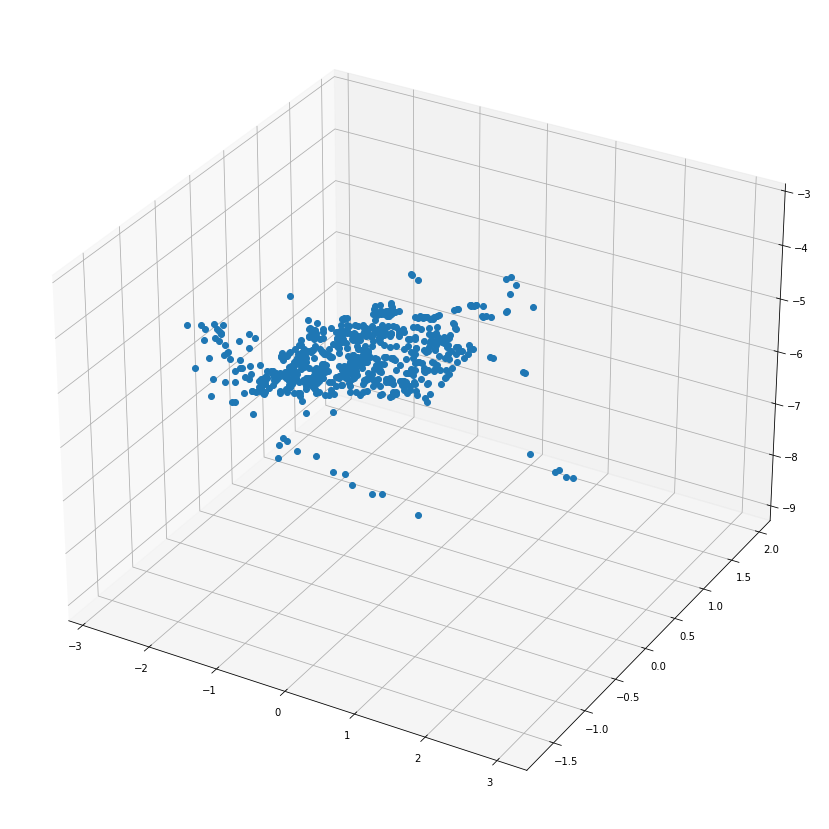

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize = [15,15])
ax = fig.gca(projection = "3d")
ax.view_init(elev = None, azim = None) #you can set elevation and azimuth with different values
ax.plot(points_3D[0], points_3D[1], points_3D[2], 'o')
plt.draw()
plt.show()

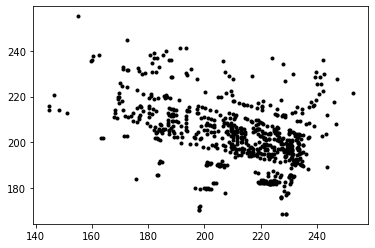

In [5]:
#projection
points_2D = project(P, points_3D)
#plot projection
from matplotlib import pyplot as plt
plt.plot(points_2D[0], points_2D[1], 'k.')
plt.show()

In [6]:
print(points_2D.shape)
print(points_3D.shape)

(3, 672)
(4, 672)


In [76]:
n_points = 66
points_3D_sampled = points_3D[:,:n_points]
points_2D_sampled = points_2D[:,:n_points]

In [77]:
points_3D_sampled.shape

(4, 66)

In [78]:
A = np.zeros((2*n_points, 12), np.float32)
for i in range(n_points):
    A[2*i,:4] = points_3D_sampled[:,i].T
    A[2*i,8:12] = -points_2D_sampled[0,i] * points_3D_sampled[:,i].T
    A[2*i+1,4:8] = points_3D_sampled[:,i].T
    A[2*i+1,8:12] = -points_2D_sampled[1,i] * points_3D_sampled[:,i].T

In [79]:
A

array([[-1.48889995e+00,  1.09407997e+00, -5.89588022e+00, ...,
        -2.46445053e+02,  1.32806604e+03, -2.25253235e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.98513504e+02,  1.06976794e+03, -1.81443314e+02],
       [-1.13932002e+00,  9.35522020e-01, -5.62824011e+00, ...,
        -2.06042099e+02,  1.23957996e+03, -2.20242920e+02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.86941147e+02,  1.06981494e+03, -1.82525848e+02],
       [ 7.84480989e-01,  6.69018984e-01, -4.64252996e+00, ...,
        -1.22498917e+02,  8.50057922e+02, -1.83102295e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.24162796e+02,  8.61604126e+02, -1.85589340e+02]], dtype=float32)

In [80]:
from scipy import linalg
p = linalg.solve(A, np.zeros((132, 1), np.float32))
print(p)

ValueError: Input a needs to be a square matrix.

In [81]:
U, S, V = linalg.svd(A)

In [82]:
minS = np.min(S)
conditon = (S == minS)
minID = np.where(conditon)
print('index of the smallest singular value is: ', minID[0])

index of the smallest singular value is:  [11]


In [83]:
P_hat = V[minID[0],:].reshape(3, 4) / minS

In [84]:
print(P)
print(P_hat)

[[100.   0. 200.   0.]
 [  0. 100. 200.   0.]
 [  0.   0.   1.   0.]]
[[ 2.9358523e+04 -3.7695208e-01  5.8715293e+04 -2.3196657e+00]
 [-5.2471310e-01  2.9357633e+04  5.8715785e+04  2.1173564e-01]
 [-5.4297727e-03 -4.3751232e-04  2.9358142e+02  1.2823679e-04]]


In [85]:
x_P_hat = project(P_hat, points_3D_sampled[:, 0])
print(x_P_hat)

[225.25276428 181.44217211   1.        ]


In [86]:
x_P = points_2D_sampled[:,0]
print(x_P)

[225.25322768 181.44331296   1.        ]


In [87]:
x_P = points_2D
x_P_hat = project(P_hat, points_3D)
dist = 0
for i in range(x_P.shape[1]):
    dist += np.linalg.norm(x_P[:,i] - x_P_hat[:,i])
dist /= x_P.shape[1]
print(dist)

0.00213988076430177


In [20]:
points_3D.size

2688

In [18]:
def caclulate_distance(n_point_percent):
    
    n_points = int((points_3D.size * n_point_percent) / 100)
    

    points_3D_sampled = points_3D[:,:n_points]
    points_2D_sampled = points_2D[:,:n_points]

    A = np.zeros((2*n_points, 2*n_points), np.float32)
    for i in range(n_points):
        A[2*i,:4] = points_3D_sampled[:,i].T
        A[2*i,8:12] = -points_2D_sampled[0,i] * points_3D_sampled[:,i].T
        A[2*i+1,4:8] = points_3D_sampled[:,i].T
        A[2*i+1,8:12] = -points_2D_sampled[1,i] * points_3D_sampled[:,i].T
    
    
    #p = linalg.solve(A, np.zeros((2*n_points, 1), np.float32))    
    U, S, V = linalg.svd(A)
    minS = np.min(S)
    conditon = (S == minS)
    minID = np.where(conditon)

    P_hat = V[minID[0],:].reshape(3, 4) / minS
    x_P_hat = project(P_hat, points_3D_sampled[:, 0])

    x_P = points_2D_sampled[:,0]
    x_P = points_2D
    x_P_hat = project(P_hat, points_3D)
    
    dist = 0
    for i in range(x_P.shape[1]):
        dist += np.linalg.norm(x_P[:,i] - x_P_hat[:,i])
    dist /= x_P.shape[1]
    return dist

In [19]:
n_points_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for i in n_points_range:
    print('Distance for {0}% of the number points in points_3D is {1}'.format(i, caclulate_distance(i)))

ValueError: cannot reshape array of size 280864 into shape (3,4)

In [17]:
import homography
import sfm
import ransac

Number of detected keypoints in img1: 25475
Number of detected keypoints in img2: 24551


(-0.5, 3871.5, 1295.5, -0.5)

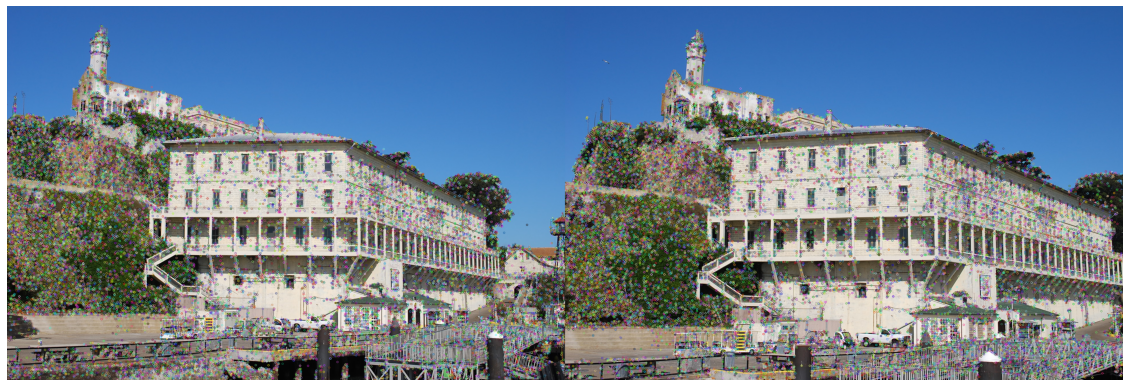

In [18]:
import cv2 as cv
sift = cv.xfeatures2d.SIFT_create()
img1 = cv.imread('alcatraz1.jpg')
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
kp1, des1 = sift.detectAndCompute(img1_gray, None)
img2 = cv.imread('alcatraz2.jpg')
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
kp2, des2 = sift.detectAndCompute(img2_gray, None)
img1_kp = img1.copy()
img1_kp = cv.drawKeypoints(img1, kp1, img1_kp)
print("Number of detected keypoints in img1: %d" % (len(kp1)))
img2_kp = img2.copy()
img2_kp = cv.drawKeypoints(img2, kp2, img2_kp)
print("Number of detected keypoints in img2: %d" % (len(kp2)))
img1_2_kp = np.hstack((img1_kp, img2_kp))
plt.figure(figsize = (20, 10))
plt.imshow(img1_2_kp[:,:,::-1])
plt.axis('off')

In [19]:
bf = cv.BFMatcher(crossCheck = True) #crossCheck = True means we want to find consistent matches
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
print("Number of consistent matches: %d" % len(matches))

Number of consistent matches: 14397


(-0.5, 3871.5, 1295.5, -0.5)

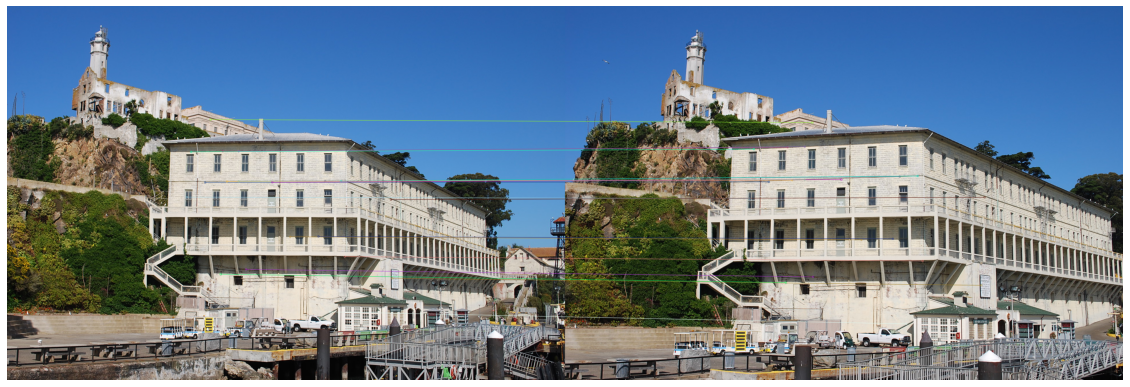

In [20]:
img1_2_matches = cv.drawMatches(img1, kp1, img2, kp2,
matches[:20],
None,
flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (20, 10))
plt.imshow(img1_2_matches[:,:,::-1])
plt.axis('off')

In [21]:
n_matches = 1000
kp1_array = np.zeros((2, n_matches), np.float32)

for i in range(n_matches):
    kp1_array[0][i] = kp1[matches[i].queryIdx].pt[0]
    kp1_array[1][i] = kp1[matches[i].queryIdx].pt[1]

kp2_array = np.zeros((2, n_matches), np.float32)
for i in range(n_matches):
    kp2_array[0][i] = kp2[matches[i].trainIdx].pt[0]
    kp2_array[1][i] = kp2[matches[i].trainIdx].pt[1]

In [22]:
x1 = homography.make_homog(kp1_array)
x2 = homography.make_homog(kp2_array)

In [23]:
K = np.array([[2394,0,932], [0,2398,628], [0,0,1]])
P1 = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0]])

In [24]:
x1n = np.dot(linalg.inv(K), x1)
x2n = np.dot(linalg.inv(K), x2)

In [25]:
#estimate E with RANSAC
model = sfm.RansacModel()
E, inliers = sfm.F_from_ransac(x1n, x2n, model)

In [26]:
#compute camera matrices (P2 will be list of four solutions)
P2_all = sfm.compute_P_from_essential(E)

#pick the solution with points in front of cameras
ind = 0
maxres = 0
for i in range(4):
    #triangulate inliers and compute depth for each camera
    X = sfm.triangulate(x1n[:, inliers], x2n[:, inliers], P1, P2_all[i])
    d1 = np.dot(P1, X)[2]
    d2 = np.dot(P2_all[i], X)[2]
    s = sum(d1 > 0) + sum(d2 > 0)
    if s > maxres:
        maxres = s
        ind = i
        infront = (d1 > 0) & (d2 > 0)
P2 = P2_all[ind]

In [27]:
#triangulate inliers and remove points not in front of both cameras
X = sfm.triangulate(x1n[:, inliers], x2n[:, inliers], P1, P2)
X = X[:, infront]

In [28]:
print(len(X[0]))

811


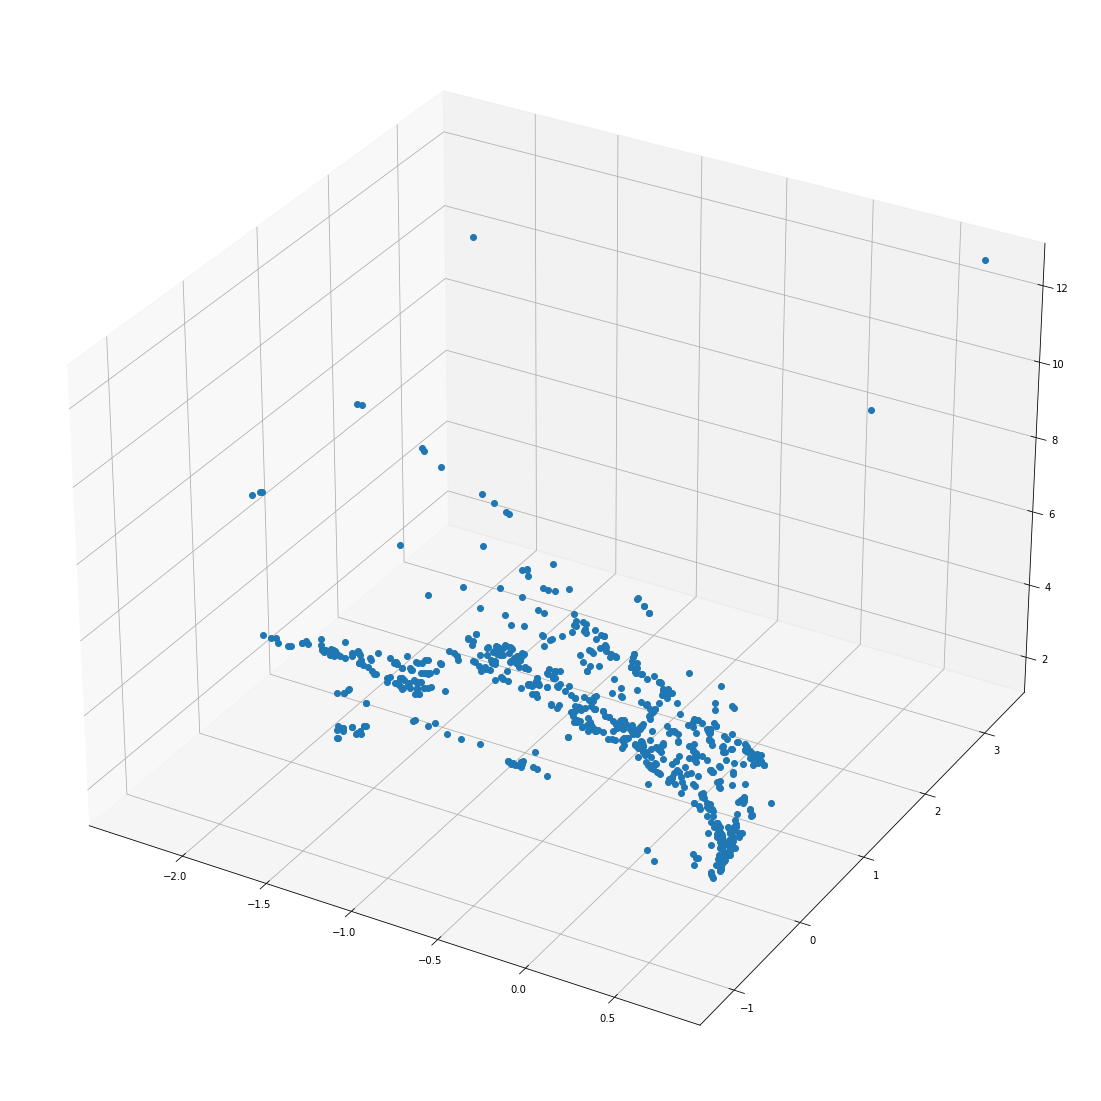

In [29]:
#3D plot
fig = plt.figure(figsize = [20,20])
ax = fig.gca(projection = "3d")
ax.view_init(elev = None, azim = None) #you can set elevation and azimuth with different values
ax.plot(X[0], X[1], X[2], 'o')
plt.draw()
plt.show()